In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import tweepy
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dilee\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dilee\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
df=pd.read_csv('genericTrain.csv',encoding='Latin-1')

In [4]:
df.shape

(7215, 2)

In [3]:
df.head(20)

,sentence,label
0,"i`m so worn out, this week has sped by soo fas...",0
1,Lookin` at spreadsheets so long my eyes are cr...,0
2,Word. Yayy twitter after dark lol.,1
3,"Well, guess we just make a pretty great pair....",0
4,BEEN TOWN WITH THE MOTHER NICE & SUNNNY,1
5,time to leave a passive agressive note to the...,0
6,I don`t think I can bear such cuteness this e...,1
7,its taking forever to upload,0
8,Yay for having a giant headache stupid glasses.,0
9,my twitter looks funny someone help!,0


In [5]:
df.isnull().sum()

sentence    0
label       0
dtype: int64

In [6]:
wordnet=WordNetLemmatizer()

In [7]:
def change_text(a):
    a=str(a)
    text=re.sub('[^a-zA-Z]',' ',a)
    text=text.lower()
    text=nltk.word_tokenize(text)
    text=[wordnet.lemmatize(word) for word in text if word not in stopwords.words('english')]
    text=' '.join(text)
    return text

In [8]:
df['tweet']=df['sentence'].apply(change_text)
df.head()

,sentence,label,tweet
0,"i`m so worn out, this week has sped by soo fas...",0,worn week sped soo fast gon na ask mum go movi...
1,Lookin` at spreadsheets so long my eyes are cr...,0,lookin spreadsheet long eye crossing
2,Word. Yayy twitter after dark lol.,1,word yayy twitter dark lol
3,"Well, guess we just make a pretty great pair....",0,well guess make pretty great pair think birthd...
4,BEEN TOWN WITH THE MOTHER NICE & SUNNNY,1,town mother nice sunnny


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X1= vectorizer.fit_transform(df['tweet'])
y=df['label']

In [10]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=10,test_size=0.2,random_state=30)

In [11]:
print(cross_val_score(MultinomialNB(),X1,y,cv=cv,scoring='accuracy'))

[0.94248094 0.91961192 0.92099792 0.92307692 0.91961192 0.93139293
 0.93069993 0.92931393 0.92862093 0.93000693]


In [12]:
print(cross_val_score(MultinomialNB(),X1,y,cv=cv,scoring='accuracy').mean())

0.9275814275814277


In [13]:
x_train,x_test,y_train,y_test=train_test_split(X1,y,test_size=0.3,random_state=42)

nb=MultinomialNB()

nb.fit(x_train,y_train)

MultinomialNB()

In [14]:
prediction=nb.predict(x_test)

In [15]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [16]:
confusion_matrix(y_test,prediction)

array([[ 835,  116],
       [  72, 1142]], dtype=int64)

In [17]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,prediction))

0.9131639722863741


In [24]:
accessToken="1272053768067010562-u4eunjqdSTtiE68q2J0x2NceCY4Jwx"
accessTokenSecret="8FZbdPVlqW1T5LhL2blrXzJgH9PXcty6wvHW0NFRqiHTR"
consumerKey="F0w2fjOVn4EUAH0MIjhA6lbDY"
consumerKeySecret="Bz5BJwUxx6GlSA7AtENuoXPAfV16UkMTSBngquicAh9PyEuBAX"

In [25]:
auth=tweepy.OAuthHandler(consumerKey,consumerKeySecret)
auth.set_access_token(accessToken,accessTokenSecret)
api=tweepy.API(auth)

In [52]:
def cleanText(text):
    text=re.sub('https?://[^\s]+','',text)
    text=re.sub('@[^\s]+','',text)
    text=re.sub(r'#','',text)
    text=re.sub(r'RT[\s]','',text)
    text=re.sub('\n',"",text)
    return text

In [53]:
numOfTweets= int(input('How many tweets to analyze'))
searchWord=input("Topic:")
date_since="2020-03-10"
tweets=tweepy.Cursor(api.search, q=searchWord, lang='en',since=date_since,tweet_mode="extended").items(numOfTweets)

How many tweets to analyze20
Topic:avengers


In [54]:
df_user_tweets=pd.DataFrame([tweet.full_text for tweet in tweets],columns=['Tweets']) 
df_user_tweets['Tweets']=df_user_tweets['Tweets'].apply(cleanText) 
df_user_tweets.drop_duplicates(keep=False,inplace=True) 
print(df_user_tweets)

                                               Tweets
0   Not to be melodramatic but NOOOOOOO! Literally...
1   Avengers Endgame Movie Poster - Marvel Univers...
2    Screw Disney, Marvel and Square Enix for putt...
4    There you go, movies that the graphic novel's...
5    "Bucky..in a way represents what the country ...
6   New Avengers End Game Fabric Poster Captain Am...
7    Reassemble Earth's Mightiest Heroes! Pre-Orde...
8     Hes using high ball avengers so it's their m...
9    Chris Evans was spotted on the set of "Avenge...
10                          I guess Avengers Endgame.
11   Cinematic parallels:The Muppets Take Manhatta...
12  Avengers Endgame Film 2019 Edition MARVEL Char...
14   This sounds like the plot of Avengers End Game 😭
15   Confession. I respect AVENGERS &amp; will rem...
16   Well they brought Gamora back in Avengers End...
17  MARVEL SUPERHEROES - LINEUP POSTER - 22x34 COM...
18   So this is the piece that has taken me the lo...
19  ICYMI: Lords of Empyre: 

In [55]:
def predict(message):
    if(nb.predict(vectorizer.transform([change_text(message)]))==1):
        return 'Positive'
    else:
        return 'Negavite'

In [56]:
from nltk.corpus import stopwords
df_user_tweets['Analysis']=df_user_tweets['Tweets'].apply(predict)

In [57]:
df_user_tweets.head(100)

,Tweets,Analysis
0,Not to be melodramatic but NOOOOOOO! Literally...,Negavite
1,Avengers Endgame Movie Poster - Marvel Univers...,Positive
2,"Screw Disney, Marvel and Square Enix for putt...",Negavite
4,"There you go, movies that the graphic novel's...",Positive
5,"""Bucky..in a way represents what the country ...",Negavite
6,New Avengers End Game Fabric Poster Captain Am...,Positive
7,Reassemble Earth's Mightiest Heroes! Pre-Orde...,Positive
8,Hes using high ball avengers so it's their m...,Positive
9,"Chris Evans was spotted on the set of ""Avenge...",Positive
10,I guess Avengers Endgame.,Negavite


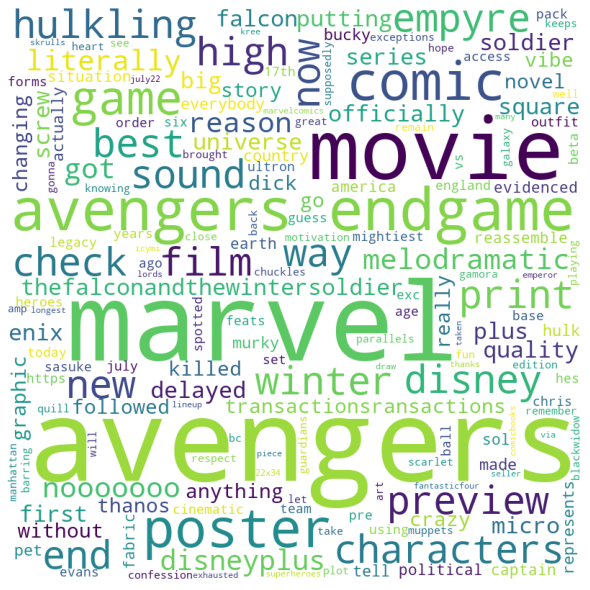

In [58]:
from wordcloud import WordCloud, STOPWORDS 
comment_words = '' 
stopwords = set(STOPWORDS) 
for val in df_user_tweets.Tweets: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

<AxesSubplot:xlabel='Analysis', ylabel='count'>

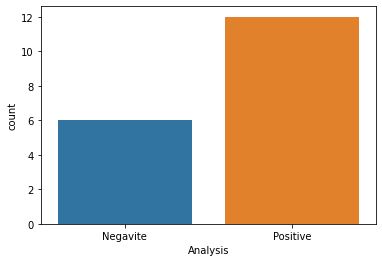

In [59]:
df_user_tweets['Analysis'].value_counts()
sns.countplot('Analysis',data=df_user_tweets)